# BATCH 16

### Importation of libraries

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np 
import re
sns.set(rc={'figure.figsize':(13.2,14.27)})

### Reading the data
```python
    lib_transaction
    exam_cell
    subject_code
```

In [9]:
lib_trans=pd.read_excel('issue_records.xlsx')
exam_cell = pd.read_excel('exam_cell_data.xlsx',index_col=0)
sub_code = pd.read_csv('mech.csv')

### This function Represents Assigning the semester details to the ```lib_tans```..

In [10]:
def assign_semester_lib(lib_data):
    lib_data=lib_data[lib_data['year'].isin([16])]
    lib_data.set_index(lib_data['issue_dt'],inplace=True)
    lib_sem1 = lib_data['2016-06-22':'2016-12-17']
    lib_sem1['semester'] = 1
    lib_sem2 = lib_data['2016-12-17':'2017-06-25']
    lib_sem2['semester'] = 2
    lib_sem3 = lib_data['2017-06-25':'2017-12-12']
    lib_sem3['semester'] = 3
    lib_sem4 = lib_data['2017-12-12':'2018-06-17']
    lib_sem4['semester'] = 4
    lib_sem5= lib_data['2018-06-17':'2018-12-12']
    lib_sem5['semester'] = 5
    lib_sem6 = lib_data['2018-12-12':'2019-06-19']
    lib_sem6['semester'] = 6
    lib_sem7 = lib_data['2019-06-19':'2019-12-02']
    lib_sem7['semester'] = 7
    lib_frames = [lib_sem1,lib_sem2,lib_sem3,lib_sem4,lib_sem5,lib_sem6,lib_sem7]
    lib_transaction = pd.concat(lib_frames)
    lib_transaction['book_id'] = lib_transaction.groupby('title').ngroup()
    lib_transaction.drop(columns=['Unnamed: 0'],inplace=True)
    return lib_transaction
    


### the function is assigned to the ```lib``` variable...

In [11]:
lib = assign_semester_lib(lib_data=lib_trans)

In [12]:
lib


,id,level,dept,year,section,access_no,title,issue_dt,due_dt,return_dt,doc,semester,book_id
issue_dt,,,,,,,,,,,,,
2016-06-22,ANFRAsTt,B,ME,16,0,35715,"ELUNTHIRU VIZHITHIRU , PART 1",2016-06-22,2016-07-06,2016-07-06,BOOK,1,175
2016-07-25,ANFRAsTt,B,ME,16,0,34361,TRANSFORMS AND PARTIAL DIFFERENTIAL EQUATIONS,2016-07-25,2016-08-01,2016-08-03,BOOK,1,732
2016-07-27,ANFRAsTt,B,ME,16,0,28278,TEXTBOOK OF FLUID MECHANICS AND HYDRAULIC MACH...,2016-07-27,2016-08-10,2016-08-03,BOOK,1,676
2016-08-05,ANFRAsTt,B,ME,16,0,g20478,TAMILAR PALAKKAVALAKANKALUM NAMPIKKAIKALUM,2016-08-05,2016-08-19,2016-08-24,BOOK,1,644
2016-08-10,ANFRAsTt,B,ME,16,0,25081,VECTOR MECHANICS FOR ENGIEERS: STATICS AND DYN...,2016-08-10,2016-08-24,2016-08-27,BOOK,1,758
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-25,NxAp7RV1,B,ME,16,0,42485,DESIGN DATA : DATA BOOK OF ENGINEERS,2019-10-25,2019-11-08,2020-01-02,BOOK,7,132
2019-07-26,JY91ui4o,B,ME,16,0,28261,TEXTBOOK OF ENGINEERING MATERIALS AND METALLURGY,2019-07-26,2019-08-09,2019-10-24,BOOK,7,669
2019-11-04,6OgZwIyl,B,ME,16,1,30496,AUTOMATIC CONTROL SYSTEMS,2019-11-04,2019-11-18,2019-11-19,BOOK,7,50


### The ```exam_cell_clean``` function has done to add ```subject_code``` &  ```course_title``` to ```exam_cell``` data.

In [13]:
def exam_cell_clean(data,sub_code):
    data=data[data['year'].isin([16])]
    li = ['FNE', 'GDH','HND1','HND2','BEC','RDS', 'RLD','SPO', 'QIZ', 'CCC','PHO','FLM','SMT']
    data = data.loc[10973:]
    data = data[~data['subjectcode'].isin(li)]
    data = data[~data['subjectcode'].str.startswith('14')]
    sub_code.rename(columns={'Course code':'subjectcode','title':'course_title'},inplace=True)
    exam_cell_merged = pd.merge(data,sub_code,how='inner',on='subjectcode')
    # exam_cell_merged.drop(columns=['Unnamed: 0'],inplace=True)
    return exam_cell_merged

### the function is assigned to the ```exam``` variable...

In [14]:
exam = exam_cell_clean(exam_cell,sub_code)

In [15]:
exam

,id,section,level,dept,year,semester,subjectcode,ciamark,esemark,total,credit,grade,course_title
0,fnEGB3Z1,1,B,ME,16,1,16CYT11,37.0,50.0,87.0,3,A+,Applied Chemistry
1,o0vzCHHX,0,B,ME,16,1,16CYT11,38.0,49.0,87.0,3,A+,Applied Chemistry
2,5Kt1kauF,1,B,ME,16,1,16CYT11,36.0,50.0,86.0,3,A+,Applied Chemistry
3,BXOH59ME,0,B,ME,16,1,16CYT11,36.0,36.0,72.0,3,A,Applied Chemistry
4,xy7RRKHn,1,B,ME,16,1,16CYT11,32.0,43.0,75.0,3,A,Applied Chemistry
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,kIHecAxf,0,B,ME,16,5,16MEE28,31.0,49.0,80.0,3,A+,Computer Integrated Manufacturing
4913,wDXZ5IJv,0,B,ME,16,5,16MEE28,18.0,33.0,51.0,3,B,Computer Integrated Manufacturing
4914,t8HSkDNx,0,B,ME,16,5,16MEE28,23.0,53.0,76.0,3,A,Computer Integrated Manufacturing
4915,ROaOVNOC,1,B,ME,16,5,16MEE28,27.0,44.0,71.0,3,A,Computer Integrated Manufacturing


### This function helps in assigning the subject_code in the ```lib_transaction``` data.. 

In [16]:
def assign_subjectcode(data,sub_code,exam_data):
    data.set_index(data['issue_dt'],inplace=True)
    chemistry = data[data['title'].str.contains('CHEMISTRY')==True]
    chemistry['subjectcode'] = '16CYT11'
    physics = data[data['title'].str.contains('PHYSICS')==True]
    physics['subjectcode'] = '16PHT11'
    maths1 = data[data['title'].str.contains('ENGINEERING MATHEMATICS')==True]
    maths1['subjectcode'] = '16MAT11'
    maths2 = data[data['title'].str.contains('ENGINEERING MATHEMATICS II')==True]
    maths2['subjectcode'] = '16MAT21'
    Communication_skills1 = data[data['title'].str.contains('COMMUNICATION')==True]
    Communication_skills1['subjectcode'] = '16ENT11'
    Communication_skills2 = data[data['title'].str.contains('COMMUNICATION')==True]
    Communication_skills2['subjectcode'] = '16ENT21'
    material_science = data[data['title'].str.contains('MATERIAL SCIENCE')==True]
    material_science['subjectcode'] =  '16PHT21'
    engineering_mechanics = data[data['title'].str.contains('ENGINEERING MECHANICS')          ==True]
    engineering_mechanics['subjectcode'] = '16GET21'
    metrology = data[data['title'].str.contains('METROLOGY')==True]
    metrology['subjectcode'] = '16GET22'
    tpde = data[data['title'].str.contains('DIFFERENTIAL')==True]
    tpde['subjectcode'] = '16MAT31'
    thermodynamics = data[data['title'].str.contains('THERMODYNAMICS')==True]
    thermodynamics['subjectcode'] = '16AUT31'
    fluid_mech = data[data['title'].str.contains('FLUID MECHANICS')==True]
    fluid_mech['subjectcode'] = '16AUT32'
    theory_machines1 = data[data['title'].str.contains('THEORY OF MACHINES')==True]
    theory_machines1['subjectcode'] = '16MET33'
    theory_machines2 = data[data['title'].str.contains('THEORY OF MACHINES II')==True]
    theory_machines2['subjectcode'] = '16MET43'
    metallurgy = data[data['title'].str.contains('METALLURGY')==True]
    metallurgy['subjectcode'] = '16MET31'
    mfj = data[data['title'].str.contains('MANUFACTURING PROCESS')==True]
    mfj['subjectcode'] = '16MET32'
    m4 = data[data['title'].str.contains('NUMERICAL METHODS')==True]
    m4['subjectcode'] = '16MAT41'
    c_prog = data[data['title'].str.contains('PROGRAMMING')==True]
    c_prog['subjectcode'] = '16CST46'
    som = data[data['title'].str.contains('STRENGTH OF MATERIALS')==True]
    som['subjectcode'] = '16MET41'
    mcp = data[data['title'].str.contains('METAL CUTTING')==True]
    mcp['subjectcode'] = '16MET42'
    edc = data[data['title'].str.contains('ELECTRICAL DRIVES')==True]
    edc['subjectcode'] = '16EET45'
    dom = data[data['title'].str.contains('DESIGN OF MACHINE ELEMENTS')==True]
    dom['subjectcode'] = '16MET51'
    design_data = data[data['title'].str.contains('DESIGN DATA')==True]
    design_data['subjectcode'] = '16MET51-16MET61'
    thermal = data[data['title'].str.contains('THERMAL')==True]
    thermal['subjectcode'] = '16MET52'
    auto = data[data['title'].str.contains('AUTOMOBILE')==True]
    auto['subjectcode'] = '16MET54'
    micro_cont = data[data['title'].str.contains('MICROCONTROLLER')==True]
    micro_cont['subjectcode'] = '16ECT56'
    fea = data[data['title'].str.contains('FINITE')==True]
    fea['subjectcode'] = '16MET61'
    transmission = data[data['title'].str.contains('DESIGN OF TRANSMISSION')==True]
    transmission['subjectcode'] = '16MET62'
    hmt = data[data['title'].str.contains('HEAT')==True]
    hmt['subjectcode'] = '16MET63'
    powerplant = data[data['title'].str.contains('POWER PLANT')==True]
    powerplant['subjectcode'] = '16MET64'
    mechatronics = data[data['title'].str.contains('MECHATRONICS')==True]
    mechatronics['subjectcode'] = '16MET71'
    evs = data[data['title'].str.contains('ENVIRONMENTAL')==True]
    evs['subjectcode'] = '16CET73'
    frames = [chemistry,physics,material_science,engineering_mechanics,metrology,tpde,maths1,maths2,Communication_skills1,Communication_skills2,theory_machines1,theory_machines2,      thermodynamics,fluid_mech,metallurgy,mfj,m4,c_prog,som,mcp,edc,dom,thermal,auto,        micro_cont,fea,transmission,hmt,powerplant,mechatronics,evs]
    new_data = pd.concat(frames)
    sub_code.rename(columns={'Course code':'subjectcode','title':'course_title'},           inplace=True)
    lib_merged = pd.merge(new_data,sub_code,on='subjectcode',how='inner')
    design_data['subjectcode'] = '16MET51-16MET61'
    design_data['course_title'] = 'Design data Book'
    # frames2 = [maths,theory_machines,Communication_skills,design_data]
    # lib_merged = lib_merged.append(frames2)
    lis = exam_data['id']
    lib_merged = lib_merged[lib_merged['id'].isin(lis)]
    return lib_merged


### the function is assigned to the ```new_lib``` variable...

In [17]:
new_lib = assign_subjectcode(data=lib,sub_code=sub_code,exam_data=exam)

In [18]:
new_lib

,id,level,dept,year,section,access_no,title,issue_dt,due_dt,return_dt,doc,semester,book_id,subjectcode,course_title
2,y6mAMTLY,B,ME,16,0,40403,ENGINEERING CHEMISTRY 1,2016-08-13,2016-08-27,2016-09-08,BOOK,1,181,16CYT11,Applied Chemistry
3,y6mAMTLY,B,ME,16,0,38594,CHEMISTRY IN ENGINEERING AND TECHNOLOGY : SYST...,2016-09-23,2016-10-07,2016-09-28,BOOK,1,95,16CYT11,Applied Chemistry
4,y6mAMTLY,B,ME,16,0,10737,APPLIED CHEMISTRY,2016-09-28,2016-10-12,2016-10-13,BOOK,1,33,16CYT11,Applied Chemistry
5,y6mAMTLY,B,ME,16,0,4997,APPLIED CHEMISTRY,2016-10-20,2016-11-03,2016-11-02,BOOK,1,33,16CYT11,Applied Chemistry
6,y6mAMTLY,B,ME,16,0,40404,ENGINEERING CHEMISTRY 1,2016-11-02,2016-11-16,2016-11-16,BOOK,1,181,16CYT11,Applied Chemistry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2214,LvsGkET2,B,ME,16,0,3627,POWER PLANT ENGINEERING : STEAM AND NUCLEAR,2019-05-11,2019-05-25,2019-05-15,BOOK,6,527,16MET64,Power Plant Engineering
2224,W0N7CvUi,B,ME,16,1,17598,MECHATRONICS: ELECTRONIC CONTROL SYSTEMS IN ME...,2018-10-25,2018-11-08,2018-11-16,BOOK,5,454,16MET71,'Mechatronics
2225,zfhyFOND,B,ME,16,1,32120,MECHATRONICS : A MULTIDISCIPLINARY APPROACH,2019-06-21,2019-07-05,2019-07-16,BOOK,7,452,16MET71,'Mechatronics
2226,U8jBXao0,B,ME,16,0,17599,MECHATRONICS: ELECTRONIC CONTROL SYSTEMS IN ME...,2019-11-06,2019-11-20,2019-11-08,BOOK,7,454,16MET71,'Mechatronics


### This function is used to calculate mean_score for ```exam``` in class and in eah semester...
### And also Library usage by ```section``` and ```semster```

In [19]:
def mean_score(lib_data,exam_data):
    class_mean_per_sem = pd.DataFrame()
    class_mean_per_sem['mean_score_sec'] = exam_data.groupby(['section','semester'])['total'].mean()
    class_mean_per_sem['library_id_frequency'] = lib_data.groupby(['section','semester'])['id'].count()
    class_mean_per_sem.reset_index(inplace=True)
    course_mean_per_sem = pd.DataFrame()
    course_mean_per_sem['course_mean_score'] = exam_data.groupby(['section','semester','subjectcode'])['total'].mean()
    course_mean_per_sem['library_freq_course_by_id'] = lib_data.groupby(['section','semester','subjectcode'])['id'].count()
    course_mean_per_sem.reset_index(inplace=True)
    return class_mean_per_sem,course_mean_per_sem



### So both ```class``` and ```course``` mean score is calculated and stored in the below variables...

In [20]:
class_mean_score,course_mean_score = mean_score(lib_data=new_lib,exam_data=exam)

In [21]:
class_mean_score

,section,semester,mean_score_sec,library_id_frequency
0,0,1,66.278146,171
1,0,2,66.442623,124
2,0,3,64.624672,141
3,0,4,67.142061,171
4,0,5,70.127877,77
5,0,6,67.888889,36
6,0,7,70.390698,22
7,1,1,64.158055,456
8,1,2,61.273556,147
9,1,3,61.951220,162


In [22]:
course_mean_score

,section,semester,subjectcode,course_mean_score,library_freq_course_by_id
0,0,1,16CYT11,64.189655,93.0
1,0,1,16ENT11,65.310345,1.0
2,0,1,16GET11,69.350877,NaN
3,0,1,16MAT11,68.132353,16.0
4,0,1,16PHT11,64.245902,55.0
...,...,...,...,...,...
93,1,7,16MEE10,79.769231,NaN
94,1,7,16MEE11,63.050000,NaN
95,1,7,16MEE18,70.896552,NaN
96,1,7,16MEE56,74.833333,NaN


### As there are no transaction in certain semester and in section, we are replacing the null values with '0': 

In [23]:
course_mean_score.fillna(0,inplace=True)

In [24]:
course_mean_score


,section,semester,subjectcode,course_mean_score,library_freq_course_by_id
0,0,1,16CYT11,64.189655,93.0
1,0,1,16ENT11,65.310345,1.0
2,0,1,16GET11,69.350877,0.0
3,0,1,16MAT11,68.132353,16.0
4,0,1,16PHT11,64.245902,55.0
...,...,...,...,...,...
93,1,7,16MEE10,79.769231,0.0
94,1,7,16MEE11,63.050000,0.0
95,1,7,16MEE18,70.896552,0.0
96,1,7,16MEE56,74.833333,0.0


### subject_code

In [25]:
sub_code

,subjectcode,course_title
0,16ENT11,Communication Skills - I
1,16MAT11,Engineering Mathematics - I
2,16PHT11,Applied Physics
3,16CYT11,Applied Chemistry
4,16GET11,introduction to Engineering
...,...,...
87,16MEE54,Spark Ignition Engines
88,16MEE56,Battery System for Electric Vehicles
89,160EXXX,Total Quality Management
90,160EXXX,Industrial Robotics


### Adding subject_code and title in the ```lib_transaction```

In [26]:
course_mean_score_merged = pd.merge(sub_code,course_mean_score,on='subjectcode',how='inner')

In [27]:
course_mean_score_merged

,subjectcode,course_title,section,semester,course_mean_score,library_freq_course_by_id
0,16ENT11,Communication Skills - I,0,1,65.310345,1.0
1,16ENT11,Communication Skills - I,1,1,62.433333,0.0
2,16MAT11,Engineering Mathematics - I,0,1,68.132353,16.0
3,16MAT11,Engineering Mathematics - I,1,1,62.658537,9.0
4,16PHT11,Applied Physics,0,1,64.245902,55.0
...,...,...,...,...,...,...
93,16MEE34,Manufacturing Systems Engineering,1,6,74.615385,0.0
94,16MEE42,Industrial Safety Management,0,6,69.857143,0.0
95,16MEE42,Industrial Safety Management,1,6,68.176471,0.0
96,16MEE56,Battery System for Electric Vehicles,0,7,73.400000,0.0


### Assigning variables for each semester

In [41]:
sem1 = exam[exam['semester']==1]
sem2 = exam[exam['semester']==2]
sem3 = exam[exam['semester']==3]
sem4 = exam[exam['semester']==4]
sem5 = exam[exam['semester']==5]
sem6 = exam[exam['semester']==6]
sem7 = exam[exam['semester']==7]

### Importing ```matplotlib``` library

In [40]:
import matplotlib.pyplot as plt 

In [73]:
def plotting(exam_cell,class_mean,course_mean,sem):
    sns.set(rc={'figure.figsize':(20.2,18.27)})
    plot = sns.boxenplot(x='course_title',y='total',hue='section',data=
    sem)
    plot.axhline(50)
    return plot
    


### The below is the correlation plot for ```course_mean_score``` & ```library_freq_course_by_id```

In [66]:
correlation = course_mean_score_merged[['course_mean_score','library_freq_course_by_id']]

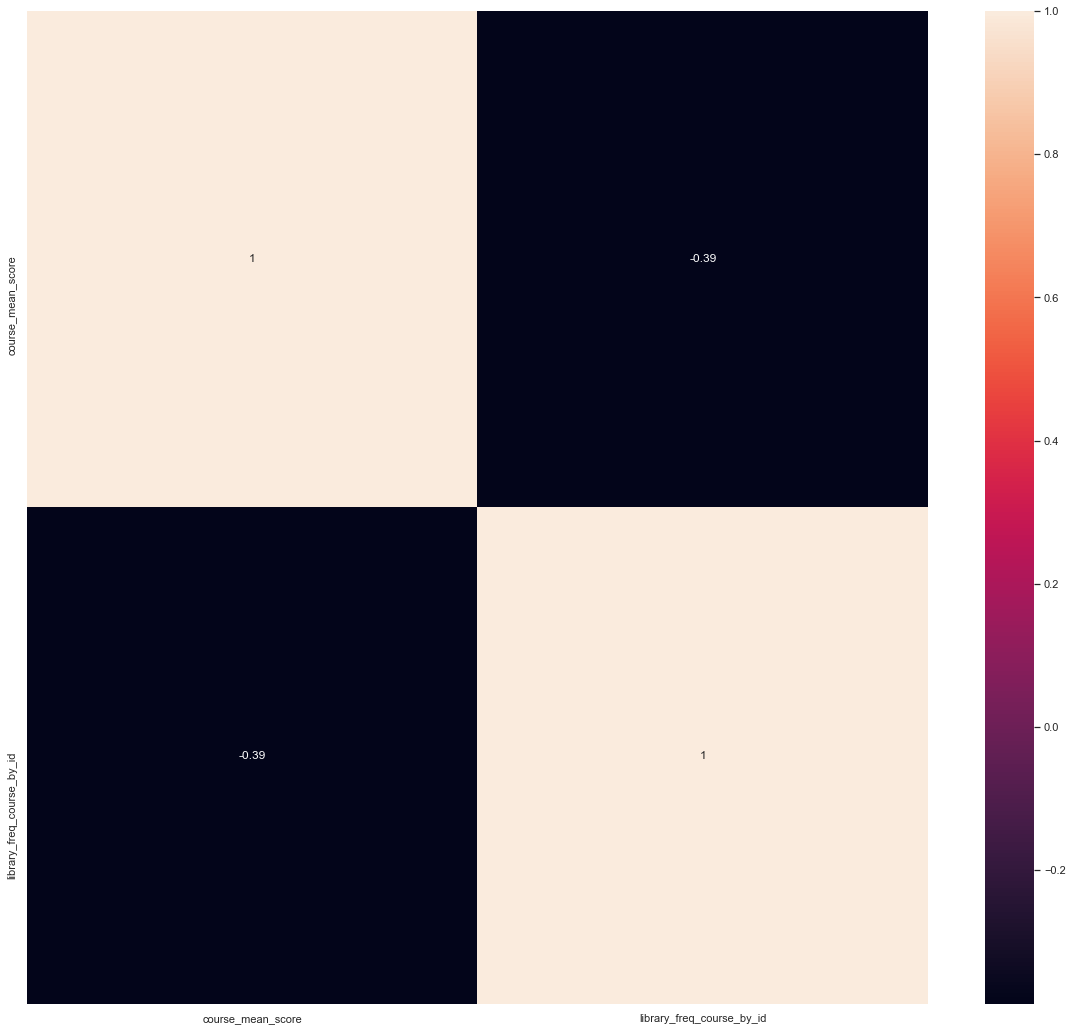

In [68]:
sns.heatmap(correlation.corr(method='pearson'),annot=True)

### Correlation based on the Semester and the Section

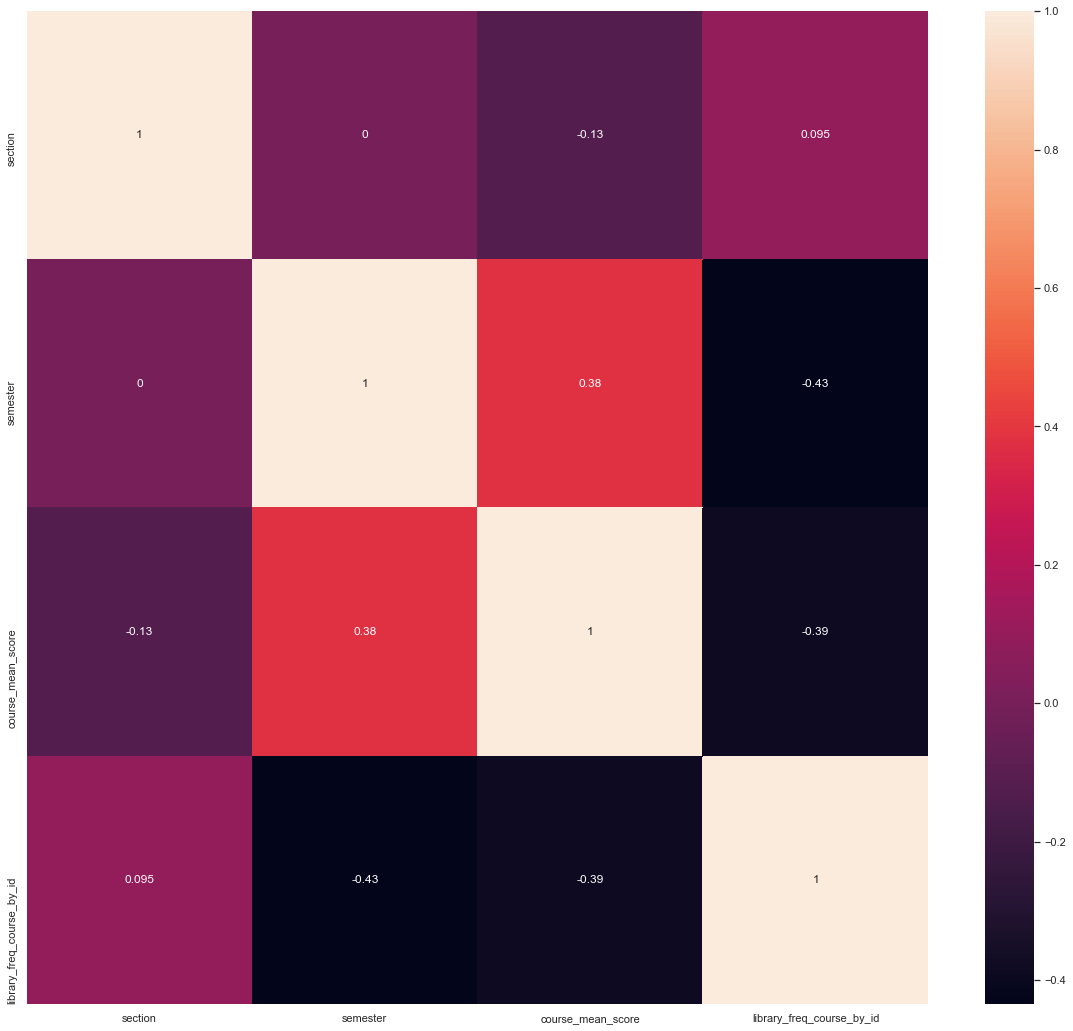

In [69]:
sns.heatmap(course_mean_score_merged.corr(method='pearson'),annot=True)

### Ploting of ```boxenplot``` for each ```semester``` and ```section``` is hued...  

### ```sem1``` boxenplot for **both** ```section```

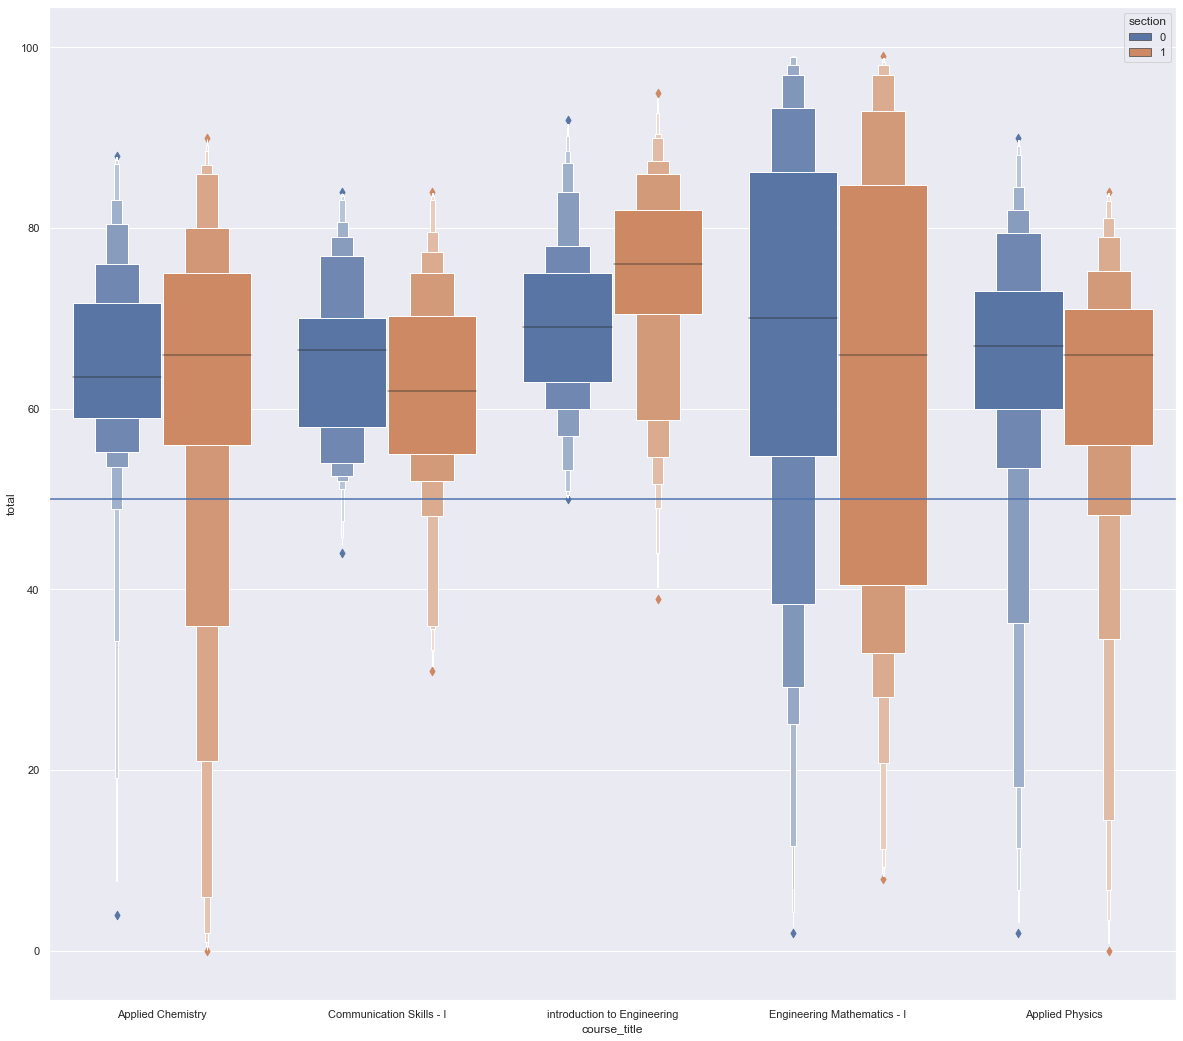

In [64]:
plotting(exam_cell=exam,class_mean=class_mean_score,course_mean=course_mean_score_merged,sem=sem1)

### ```sem2``` boxenplot for **both** ```section```

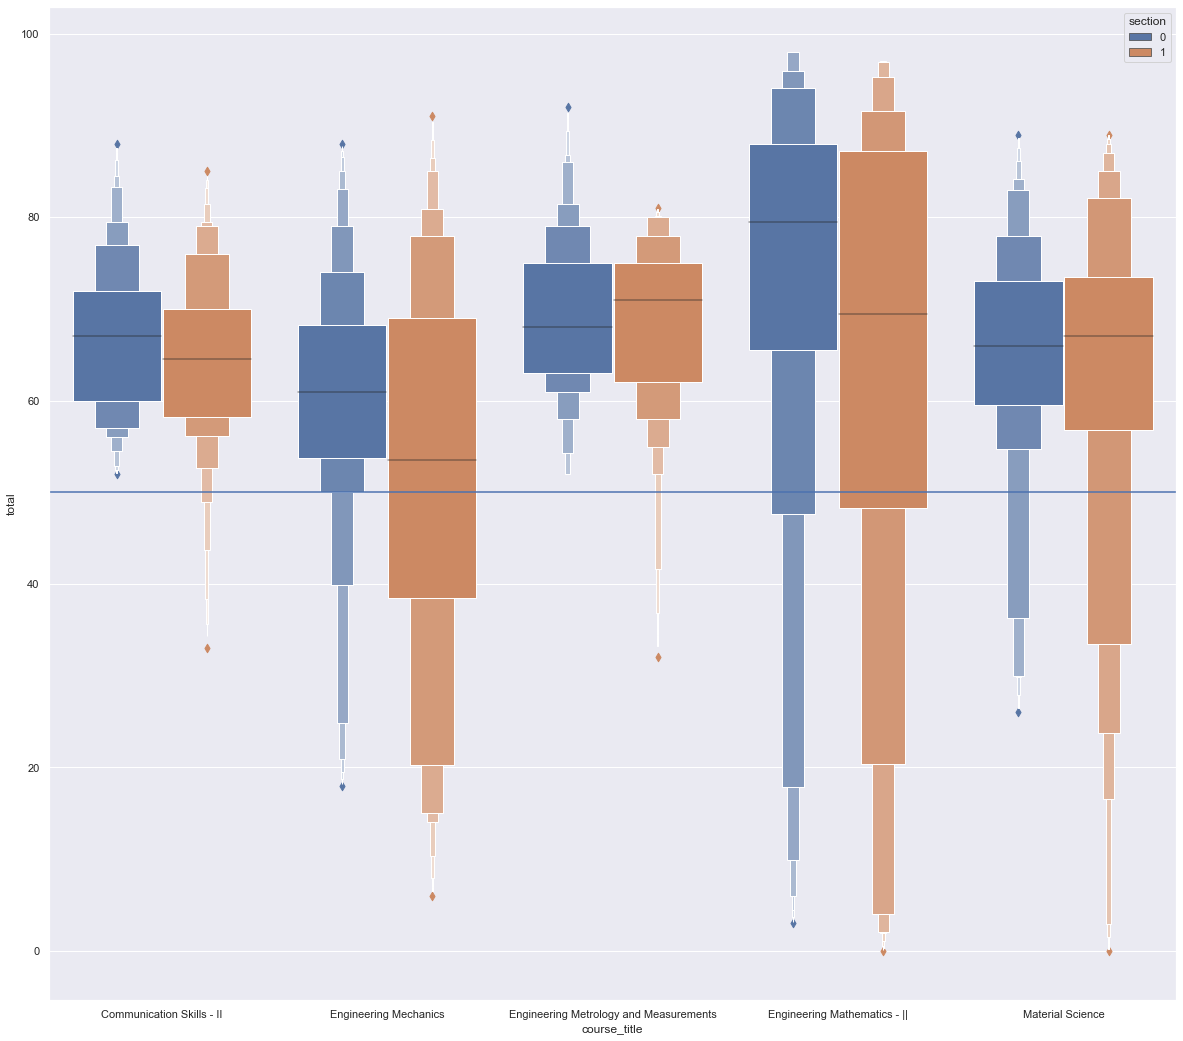

In [55]:
plotting(exam_cell=exam,class_mean=class_mean_score,course_mean=course_mean_score_merged,sem=exam_sem(exam_cell=exam,sem_num=sem2))

### ```sem3``` boxenplot for **both** ```section```

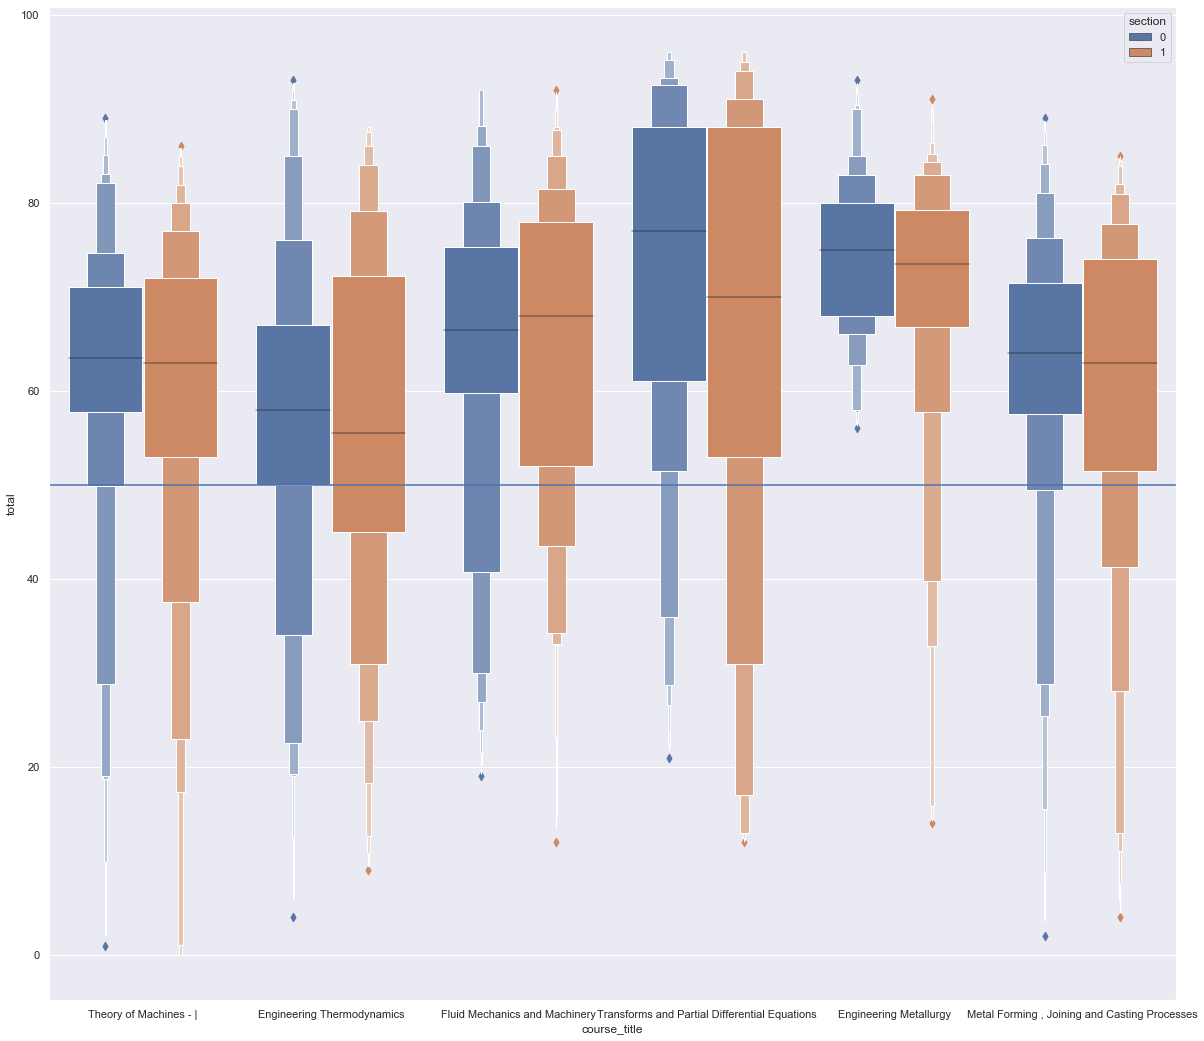

In [56]:
plotting(exam_cell=exam,class_mean=class_mean_score,course_mean=course_mean_score_merged,sem=exam_sem(exam_cell=exam,sem_num=sem3))

### ```sem4``` boxenplot for **both** ```section```

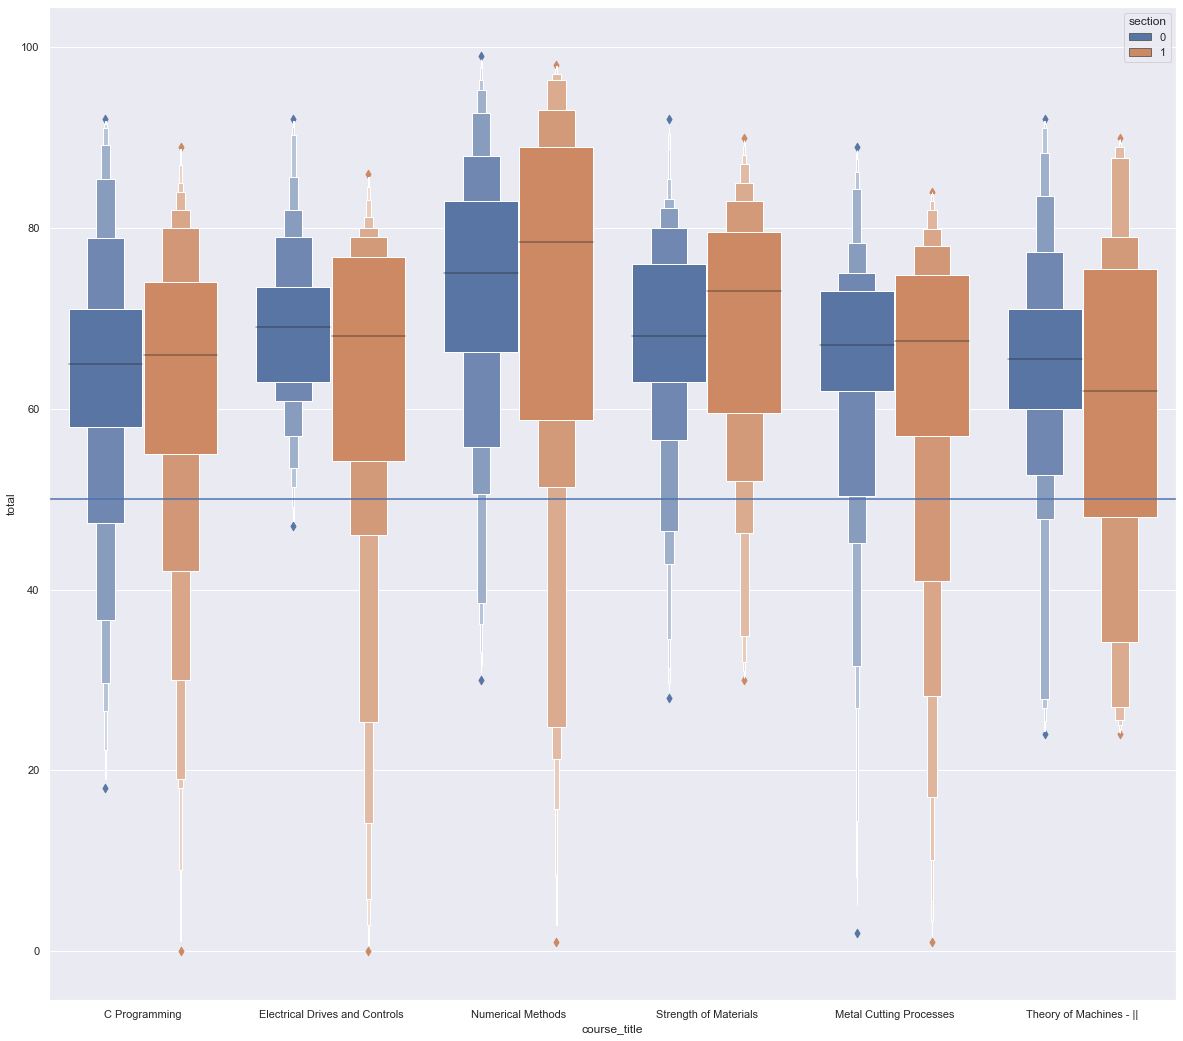

In [57]:
plotting(exam_cell=exam,class_mean=class_mean_score,course_mean=course_mean_score_merged,sem=exam_sem(exam_cell=exam,sem_num=sem4))

### ```sem5``` boxenplot for **both** ```section```

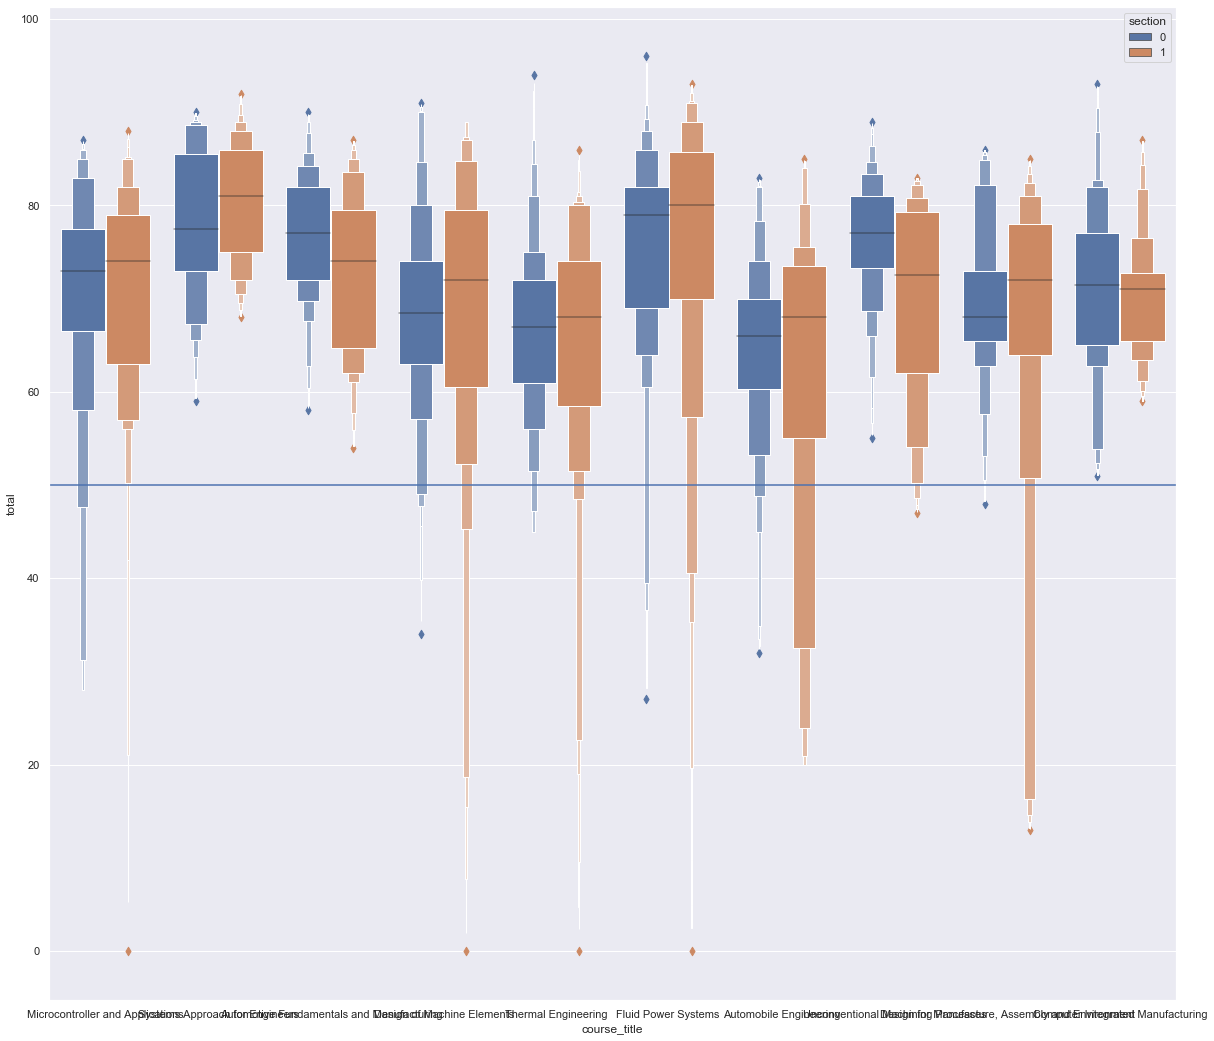

In [58]:
plotting(exam_cell=exam,class_mean=class_mean_score,course_mean=course_mean_score_merged,sem=exam_sem(exam_cell=exam,sem_num=sem5))

### ```sem6``` boxenplot for **both** ```section```

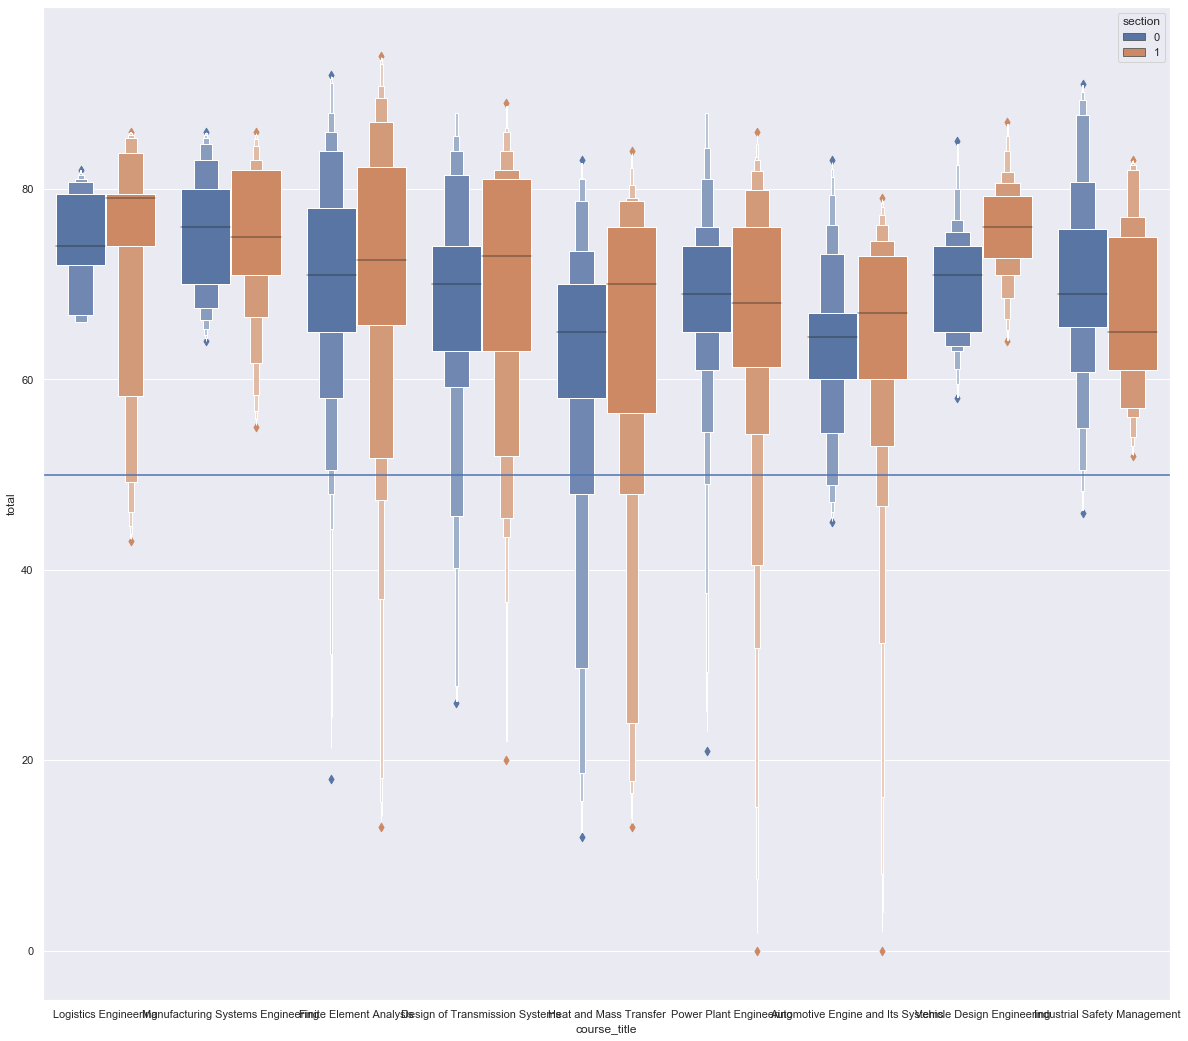

In [59]:
plotting(exam_cell=exam,class_mean=class_mean_score,course_mean=course_mean_score_merged,sem=exam_sem(exam_cell=exam,sem_num=sem6))

### ```sem7``` boxenplot for **both** ```section```

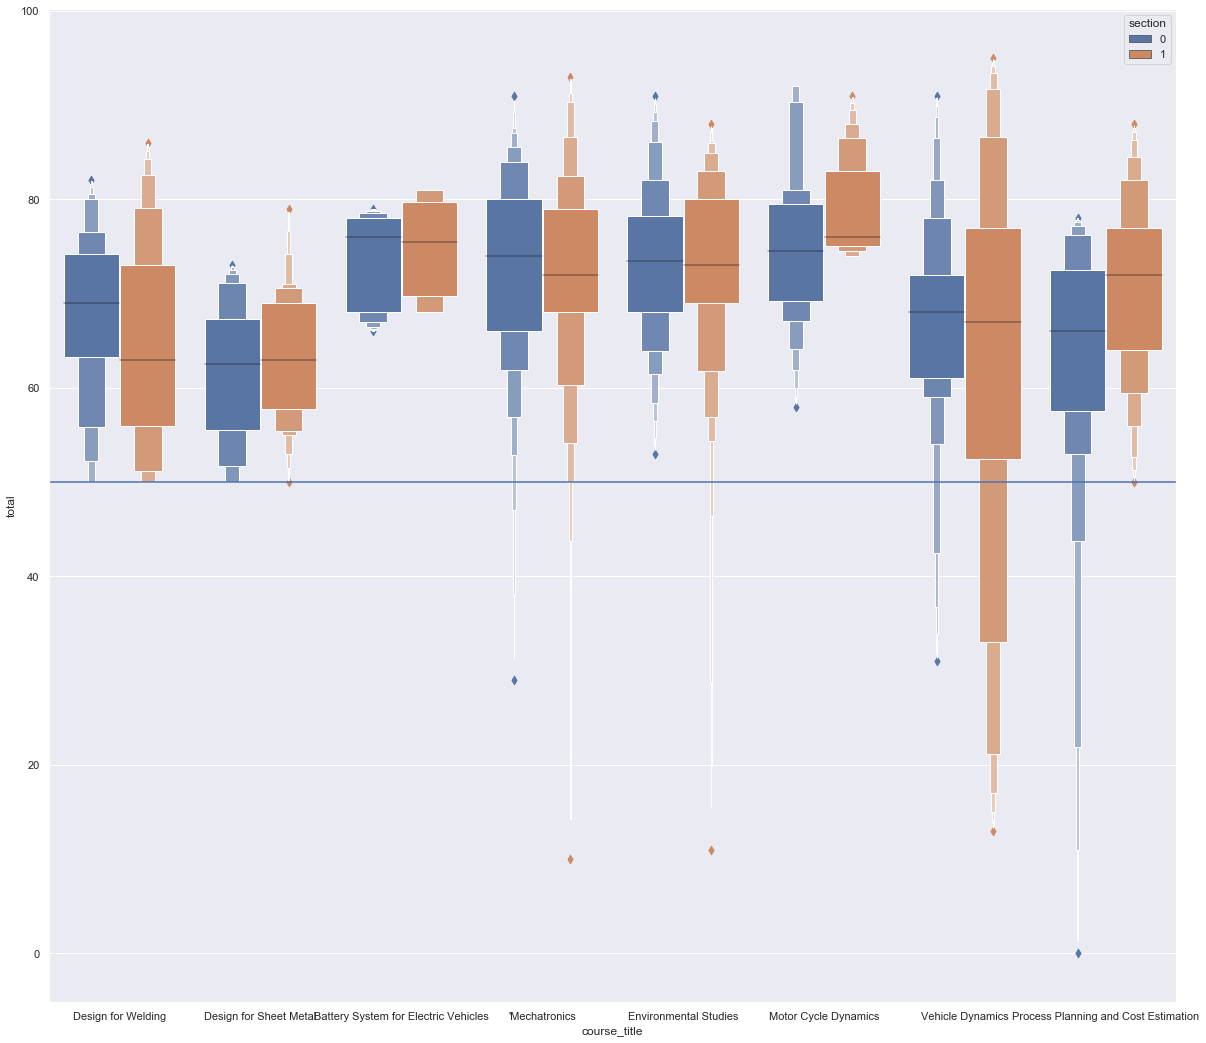

In [60]:
plotting(exam_cell=exam,class_mean=class_mean_score,course_mean=course_mean_score_merged,sem=exam_sem(exam_cell=exam,sem_num=sem7))